**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))

## Import annotation: Motif

In [2]:
FD_MTF = file.path(FD_ANN, "motif_cluster_jvierstra", "hg38_archetype_motifs_v1")

In [3]:
ctypes = c(col_character(), col_integer(), col_integer(), col_character(), col_double())
cnames = c("Chrom", "Start", "End", "Motif", "Score")
chrom = "chr17"

fdiry = file.path(FD_MTF, chrom)
fname = "NR_20_merge.bed"

dat_mtf_nr20 = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

head(dat_mtf_nr20)

Chrom,Start,End,Motif,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr17,60454,60468,NR/20,8.3104
chr17,60718,60732,NR/20,8.8112
chr17,63497,63512,NR/20,7.7355
chr17,64716,64731,NR/20,7.7355
chr17,68541,68555,NR/20,8.0613
chr17,71948,71962,NR/20,8.0613


In [4]:
dat_mtf_nr20_per1 = dat_mtf_nr20 %>% dplyr::filter(Start >= 8148000, End <= 8160000)
dat_mtf_nr20_per1

Chrom,Start,End,Motif,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr17,8150232,8150246,NR/20,8.32560
chr17,8150831,8150845,NR/20,7.34290
chr17,8151912,8151926,NR/20,11.86410
chr17,8154459,8154474,NR/20,15.34770
chr17,8154760,8154775,NR/20,8.20005


## Import library size

In [5]:
fdiry = file.path(FD_RES, "source")
fname = "library_size.tsv"
fpath = file.path(fdiry, fname)

###
fun = function(x){exp(mean(log(x)))}
dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% 
    group_by(Group) %>% 
    mutate(Size_Group = fun(Size))

###
dat_lib = dat
print(dim(dat))
dat

[1] 54  4


Sample,Group,Size,Size_Group
<chr>,<chr>,<dbl>,<dbl>
Input1_20x,Input_20x,371718546,363877945
Input1,Input,18666630,19115894
Input2_20x,Input_20x,347635732,363877945
Input2,Input,20167924,19115894
Input3_20x,Input_20x,349994051,363877945
Input3,Input,23280988,19115894
Input4_20x,Input_20x,413508358,363877945
Input4,Input,19003938,19115894
Input5_20x,Input_20x,341110487,363877945


## Import coverage data

**Check data**

In [7]:
fdiry  = file.path(FD_RES, "coverage")
fname  = "target_PER1_perbase.tsv.gz"
fglob  = file.path(fdiry, "*", fname)
print(fglob)
print(Sys.glob(fglob))

[1] "/mount/work/out/proj_combeffect/coverage/*/target_PER1_perbase.tsv.gz"
 [1] "/mount/work/out/proj_combeffect/coverage/Input1_20x/target_PER1_perbase.tsv.gz"
 [2] "/mount/work/out/proj_combeffect/coverage/Input1/target_PER1_perbase.tsv.gz"    
 [3] "/mount/work/out/proj_combeffect/coverage/Input2_20x/target_PER1_perbase.tsv.gz"
 [4] "/mount/work/out/proj_combeffect/coverage/Input2/target_PER1_perbase.tsv.gz"    
 [5] "/mount/work/out/proj_combeffect/coverage/Input3_20x/target_PER1_perbase.tsv.gz"
 [6] "/mount/work/out/proj_combeffect/coverage/Input3/target_PER1_perbase.tsv.gz"    
 [7] "/mount/work/out/proj_combeffect/coverage/Input4_20x/target_PER1_perbase.tsv.gz"
 [8] "/mount/work/out/proj_combeffect/coverage/Input4/target_PER1_perbase.tsv.gz"    
 [9] "/mount/work/out/proj_combeffect/coverage/Input5_20x/target_PER1_perbase.tsv.gz"
[10] "/mount/work/out/proj_combeffect/coverage/Input5/target_PER1_perbase.tsv.gz"    
[11] "/mount/work/out/proj_combeffect/coverage/TFX2_Dex/target_P

**Import**

In [8]:
SAMPLES = c(
    paste0("Input", 1:5),
    paste0("Input", 1:5, "_20x"),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex"))

In [16]:
### set column types and names
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Count")

### set file directory
fdiry  = file.path(FD_RES, "coverage")
fname = "target_PER1_perbase.tsv.gz"

### loop samples and import
lst = lapply(SAMPLES, function(SAMPLE){
    fpath = file.path(fdiry, SAMPLE, fname)
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = SAMPLE
    return(dat)
})

### combine sampels and library size
dat = bind_rows(lst)
dat = left_join(dat, dat_lib, by="Sample")
dat = dat %>% mutate(CPM = Count / Size)

### assign and show
dat_cov = dat
print(dim(dat))
head(dat)

[1] 216018      8


Chrom,Loc,Count,Sample,Group,Size,Size_Group,CPM
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr17,8148000,10,Input1,Input,18666630,19115894,5.357153e-07
chr17,8148001,10,Input1,Input,18666630,19115894,5.357153e-07
chr17,8148002,10,Input1,Input,18666630,19115894,5.357153e-07
chr17,8148003,10,Input1,Input,18666630,19115894,5.357153e-07
chr17,8148004,10,Input1,Input,18666630,19115894,5.357153e-07
chr17,8148005,10,Input1,Input,18666630,19115894,5.357153e-07


## summarize

In [10]:
### calculate stats for each location
dat = dat_cov
dat = dat %>% 
    group_by(Loc, Group) %>% 
    summarise(
        CPM_Mean = mean(CPM),
        CPM_Std  = sd(CPM),
        .groups = "drop") %>%
    mutate(
        CPM_Up = CPM_Mean + CPM_Std,
        CPM_Dw = CPM_Mean - CPM_Std)

### assign and show
dat_sum = dat
print(dim(dat))
head(dat)

[1] 48004     6


Loc,Group,CPM_Mean,CPM_Std,CPM_Up,CPM_Dw
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
8148000,Input,7.638469e-07,2.165235e-07,9.803704e-07,5.473234e-07
8148000,Input_20x,1.210368e-06,1.147199e-07,1.325088e-06,1.095648e-06
8148000,TFX_Dex,8.755315e-07,5.541334e-07,1.429665e-06,3.213981e-07
8148000,TFX_DMSO,1.264850e-06,4.131595e-07,1.678009e-06,8.516904e-07
8148001,Input,7.638469e-07,2.165235e-07,9.803704e-07,5.473234e-07
8148001,Input_20x,1.213160e-06,1.144067e-07,1.327566e-06,1.098753e-06


## Visualize coverage (different groups)

In [24]:
dat     = dat_mtf_nr20_per1
gpt_ant = annotate("rect",
         xmin = dat$Start, 
         xmax = dat$End, 
         ymin = -Inf, 
         ymax =  Inf,
         fill = "red")

**Input**

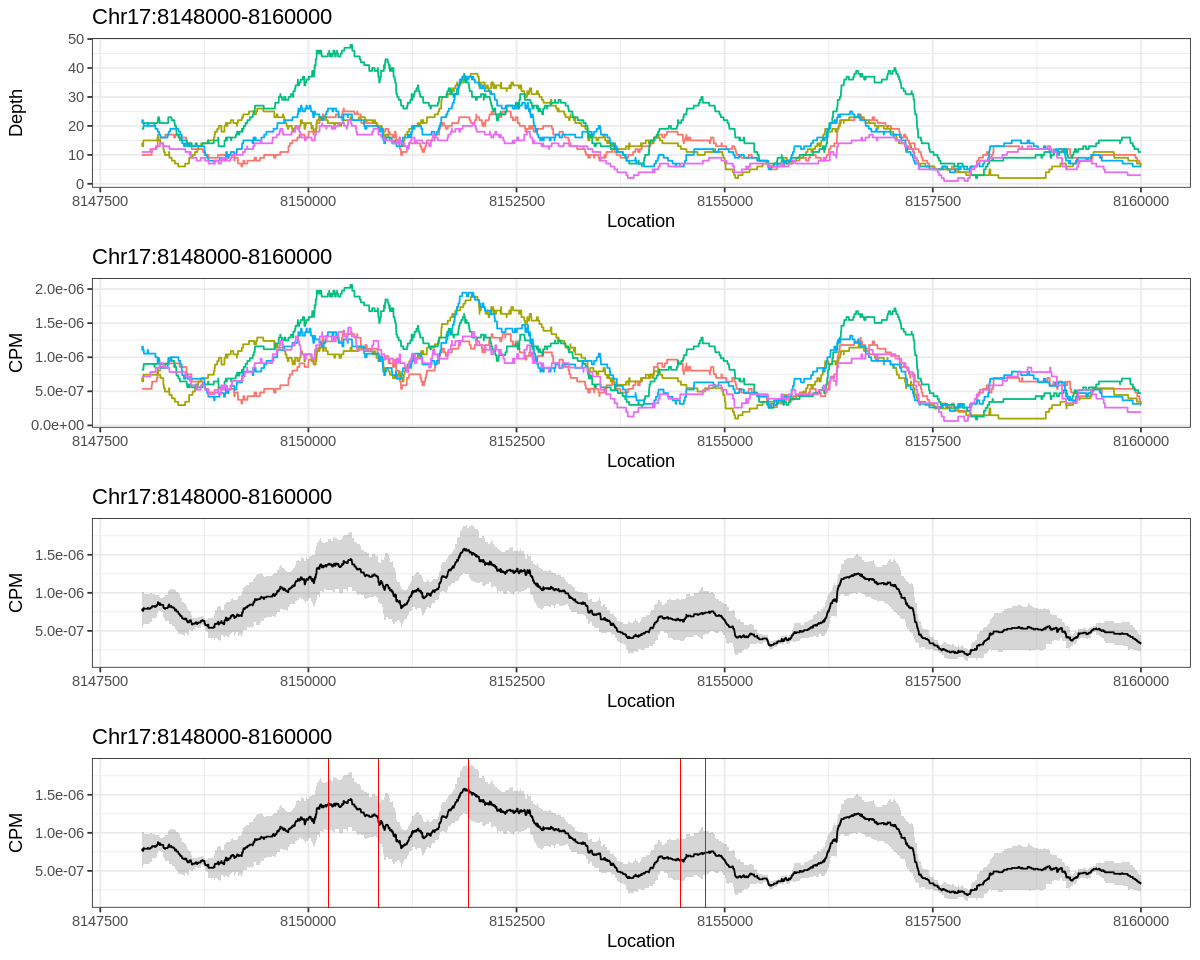

In [25]:
### set what to plot
group = "Input"

### set data for plotting
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

### create plots
gp1 = ggplot(df1, aes(x=Loc, y=Count, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Count") +
    theme(legend.position = "None")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="CPM")

gp4 = gp3 + gpt_ant

options(repr.plot.height=8, repr.plot.width=10)
plot_grid(gp1, gp2, gp3, gp4, ncol = 1, align = "v")

**Input_20x**

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


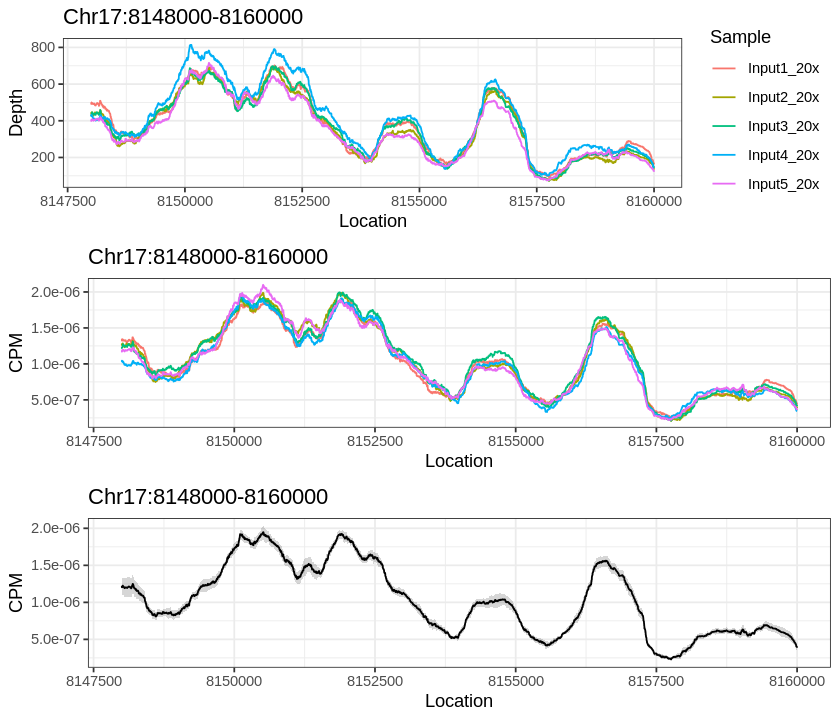

In [8]:
###
group = "Input_20x"

###
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

###
gp1 = ggplot(df1, aes(x=Loc, y=Depth, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Depth")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="CPM")

#gp1 = 
#leg = as._ggplot(get_legend(gp1))

options(repr.plot.height=6, repr.plot.width=7)
plot_grid(gp1, gp2, gp3, ncol = 1, align = "v")

**TFX_DMSO**

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


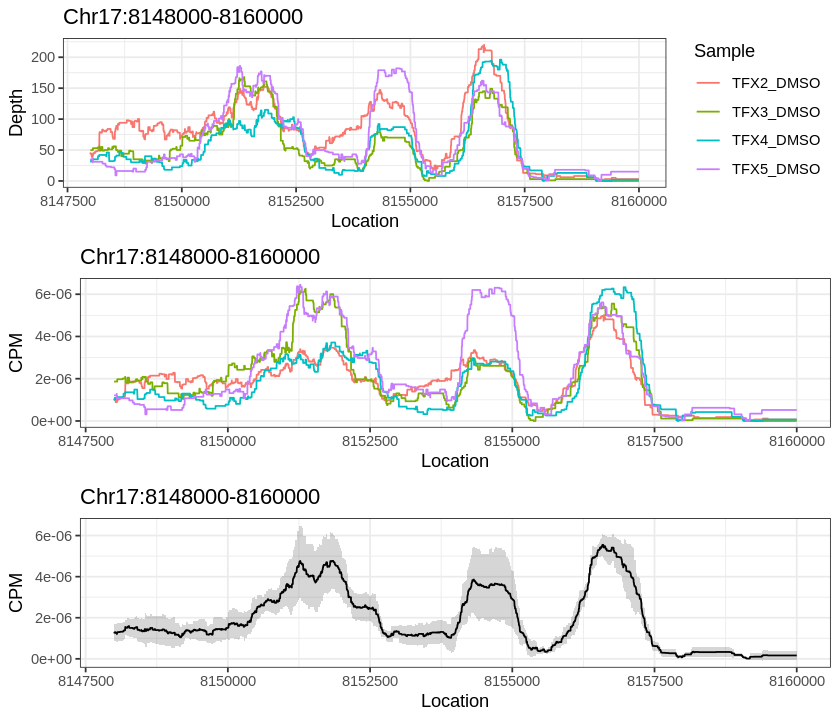

In [9]:
###
group = "TFX_DMSO"

###
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

###
gp1 = ggplot(df1, aes(x=Loc, y=Depth, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Depth")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="CPM")

#gp1 = 
#leg = as._ggplot(get_legend(gp1))

options(repr.plot.height=6, repr.plot.width=7)
plot_grid(gp1, gp2, gp3, ncol = 1, align = "v")

**TFX_Dex**

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


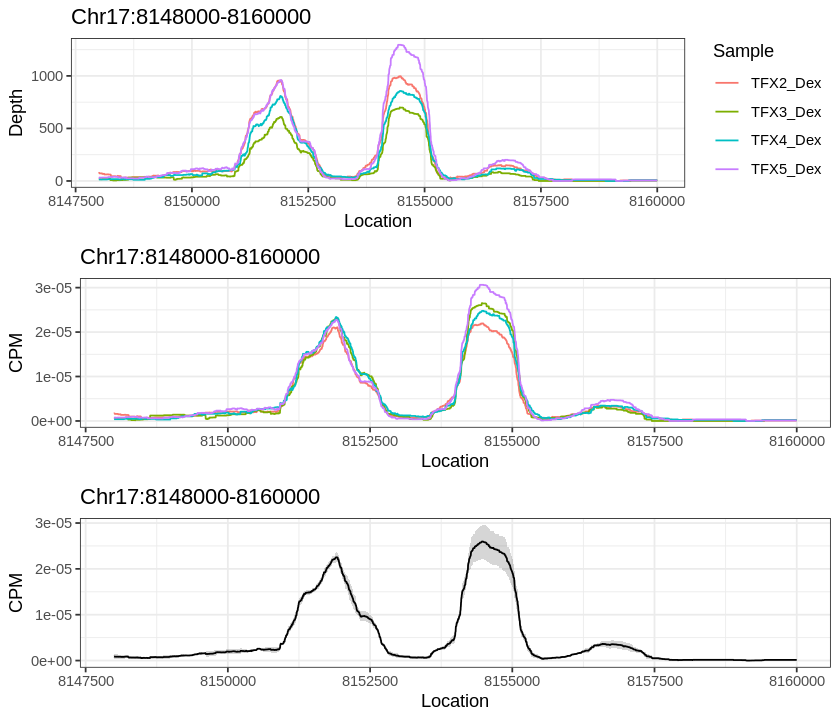

In [10]:
###
group = "TFX_Dex"

###
dat = dat_cov
df1 = dat %>% dplyr::filter(Group == group)

dat = dat_sum
df2 = dat %>% dplyr::filter(Group == group)

###
gp1 = ggplot(df1, aes(x=Loc, y=Depth, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Depth")

gp2 = ggplot(df1, aes(x=Loc, y=CPM, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="CPM") +
    theme(legend.position = "None")

gp3 = ggplot(df2, aes(x=Loc, y=CPM_Mean)) + 
    geom_ribbon(aes(ymin=CPM_Dw, ymax=CPM_Up), alpha=0.2) +
    geom_line(size=0.5) +
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="CPM")

#gp1 = 
#leg = as._ggplot(get_legend(gp1))

options(repr.plot.height=6, repr.plot.width=7)
plot_grid(gp1, gp2, gp3, ncol = 1, align = "v")